Dataset - https://www.kaggle.com/datasets/yakhyojon/customer-satisfaction-in-airline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

%matplotlib inline

In [2]:
df = pd.read_csv('Invistico_Airline.csv')

In [3]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
df.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [5]:
df.shape

(129880, 22)

In [6]:
df = df.dropna()

# EDA

In [7]:
df.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [8]:
df['Customer Type'].describe(), df['Customer Type'].unique()

(count             129487
 unique                 2
 top       Loyal Customer
 freq              105773
 Name: Customer Type, dtype: object,
 array(['Loyal Customer', 'disloyal Customer'], dtype=object))

In [9]:
df['Customer Type'] = (df['Customer Type'] == 'Loyal Customer').astype(int)

In [10]:
df['satisfaction'].describe(), df['satisfaction'].unique() 

(count        129487
 unique            2
 top       satisfied
 freq          70882
 Name: satisfaction, dtype: object,
 array(['satisfied', 'dissatisfied'], dtype=object))

In [11]:
df['satisfaction'] = (df['satisfaction'] == 'satisfied').astype(int)

In [12]:
df['Type of Travel'].describe(), df['Type of Travel'].unique()

(count              129487
 unique                  2
 top       Business travel
 freq                89445
 Name: Type of Travel, dtype: object,
 array(['Personal Travel', 'Business travel'], dtype=object))

In [13]:
df['Type of Travel'] = (df['Type of Travel'] == 'Business travel').astype(int)

In [14]:
df['Class'].describe(), df['Class'].unique()

(count       129487
 unique           3
 top       Business
 freq         61990
 Name: Class, dtype: object,
 array(['Eco', 'Business', 'Eco Plus'], dtype=object))

In [15]:
df = df[['satisfaction', 'Food and drink', 'Seat comfort', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Inflight entertainment']]

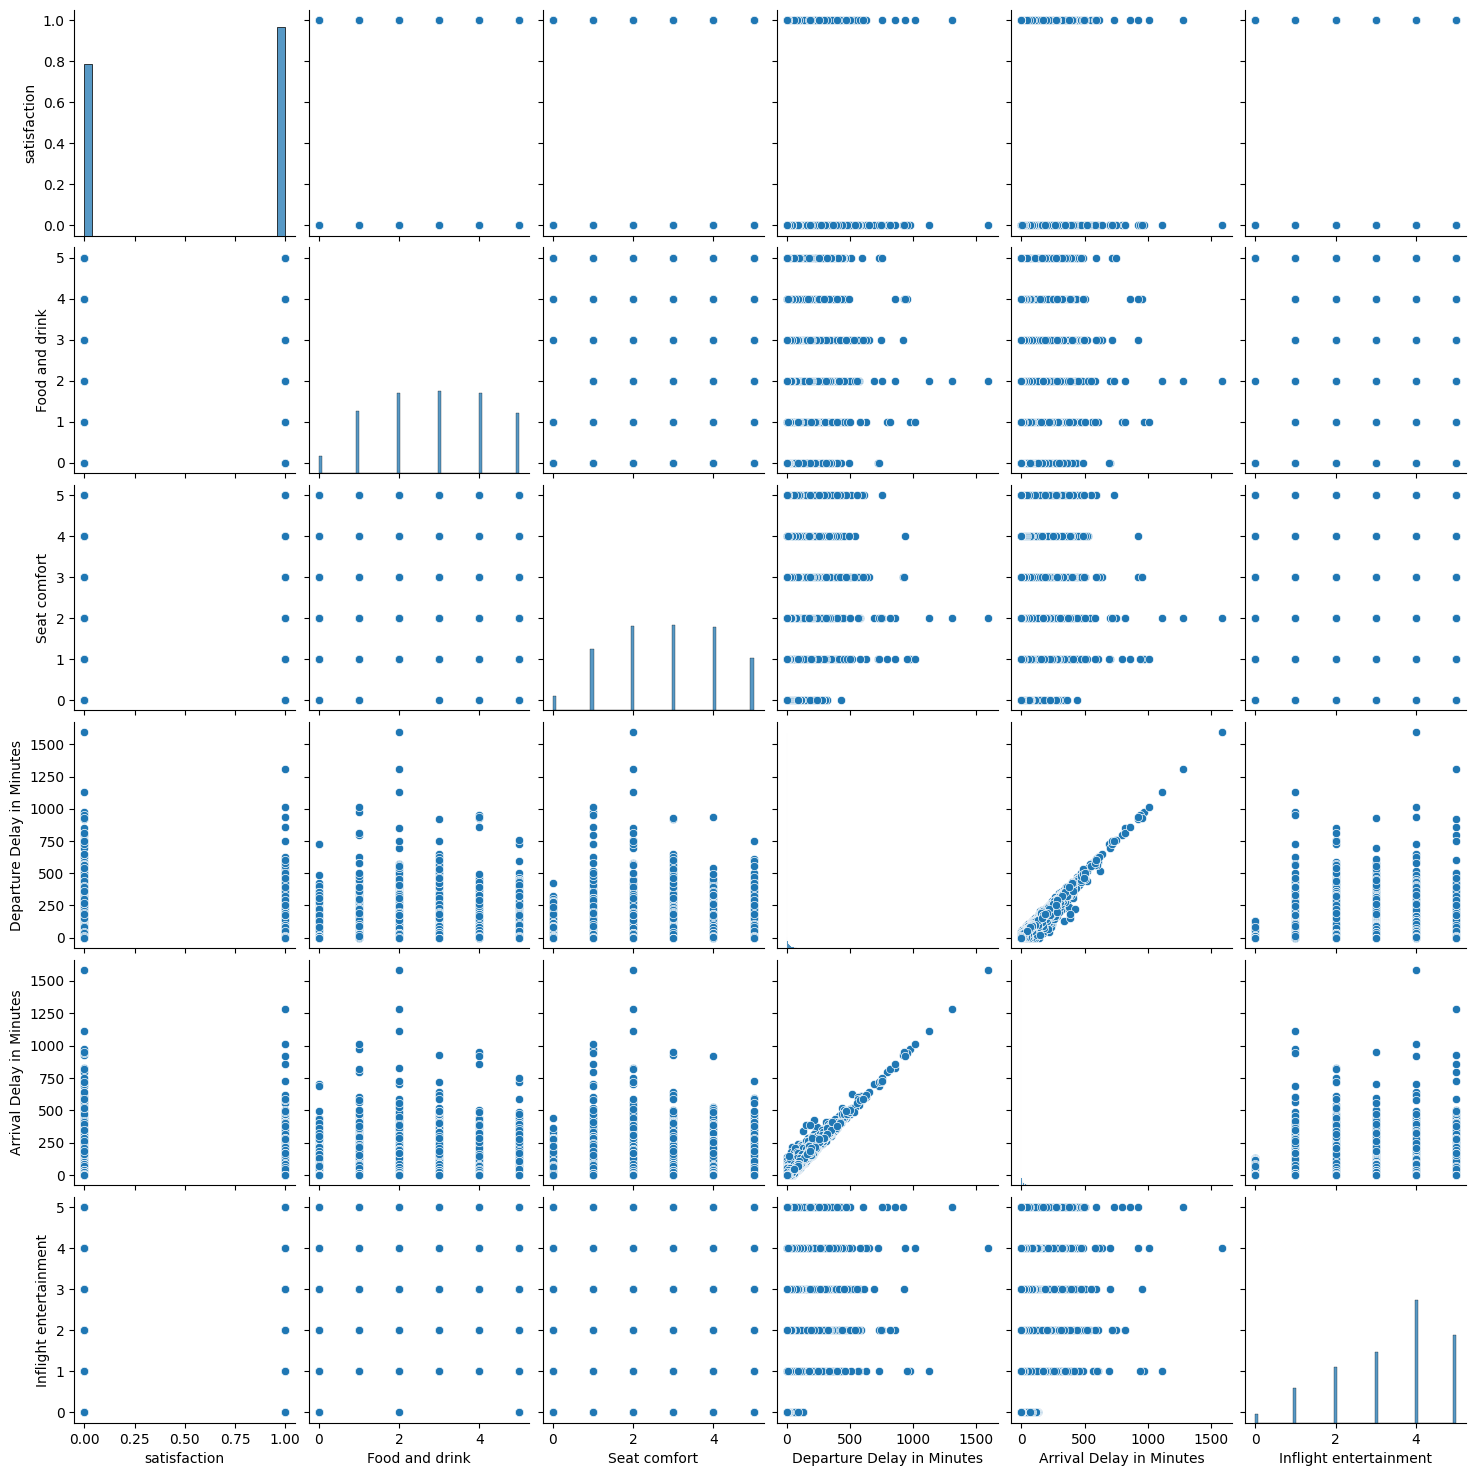

In [16]:
sns.pairplot(df)

# Prepare data

In [17]:
X, y = df.drop(columns=['satisfaction']), df['satisfaction']

In [18]:
X.shape, y.shape

((129487, 5), (129487,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, y_train.shape

((103589, 5), (103589,))

Scale data

In [21]:
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train linear model

In [23]:
clf_model = LogisticRegression()

In [24]:
clf_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
X.columns

Index(['Food and drink', 'Seat comfort', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Inflight entertainment'],
      dtype='object')

In [26]:
clf_model.coef_

array([[-0.50381924,  0.42320794,  0.11989282, -0.29904492,  1.36072021]])

# Predict and compute logistic regression metrics

In [27]:
y_pred = clf_model.predict(X_test)

In [28]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.790717
Precision: 0.795481
Recall: 0.827804
F1 Score: 0.811321


# Train Decision tree

In [47]:
tree_model = DecisionTreeClassifier(max_depth=5)

In [48]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [49]:
X.columns

Index(['Food and drink', 'Seat comfort', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Inflight entertainment'],
      dtype='object')

In [50]:
tree_model.feature_importances_

array([4.61021590e-02, 2.71706891e-01, 3.38779591e-07, 4.64276451e-03,
       6.77547847e-01])

In [51]:
tree_model.get_n_leaves()

31

In [52]:
tree_model.get_depth()

5

In [53]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Predict and compute tree metrics

In [54]:
y_pred = tree_model.predict(X_test)


In [55]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))


Accuracy: 0.859062
Precision: 0.841981
Recall: 0.911842
F1 Score: 0.875520
